✅ All imports successful
Project Root: C:\Users\Bharat\OneDrive\Desktop\bharat\NSE Stock Analysis\Src Program\Nse-stock-analysis\notebooks

📊 Data Directory: C:\Users\Bharat\OneDrive\Desktop\bharat\NSE Stock Analysis\Src Program\Nse-stock-analysis\data
📈 Indicators Directory: C:\Users\Bharat\OneDrive\Desktop\bharat\NSE Stock Analysis\Src Program\Nse-stock-analysis\data\indicators

📁 Available indicator files (5):
   - HDFCBANK_indicators.csv
   - INFY_indicators.csv
   - KOTAKBANK_indicators.csv
   - RELIANCE_indicators.csv
   - TCS_indicators.csv
✅ RELIANCE: 494 rows loaded
✅ TCS: 494 rows loaded
✅ HDFCBANK: 494 rows loaded
✅ INFY: 494 rows loaded
✅ KOTAKBANK: 494 rows loaded

📋 Data Structure for RELIANCE:
Shape: (494, 19)

Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Histogram', 'Supertrend', 'Supertrend_Direction', 'Supertrend_Long', 'Supertrend_Short', 'BB_Lower_20', 'BB_Middle_20', 'BB_Upper_20', 'BB_Bandwidth_20', 'BB_Percent

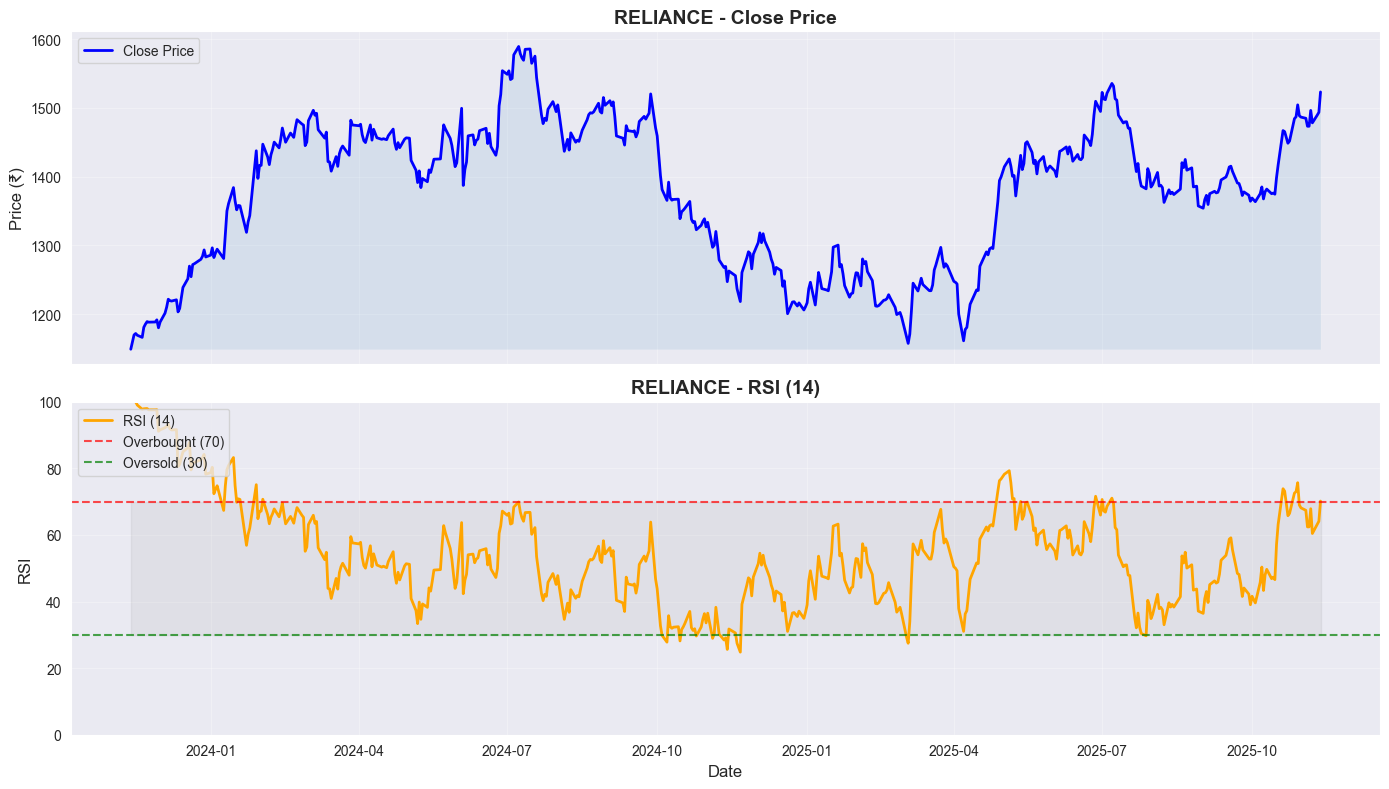

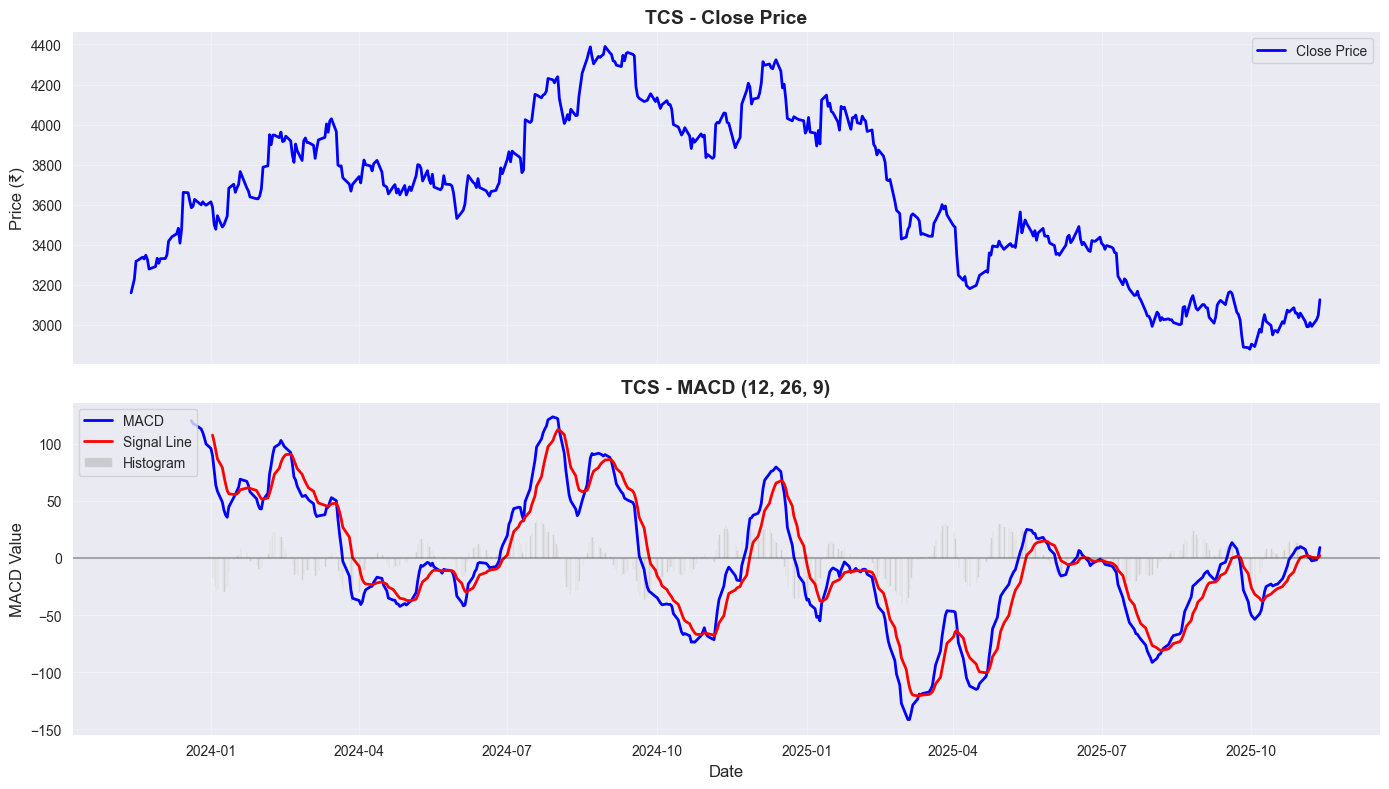

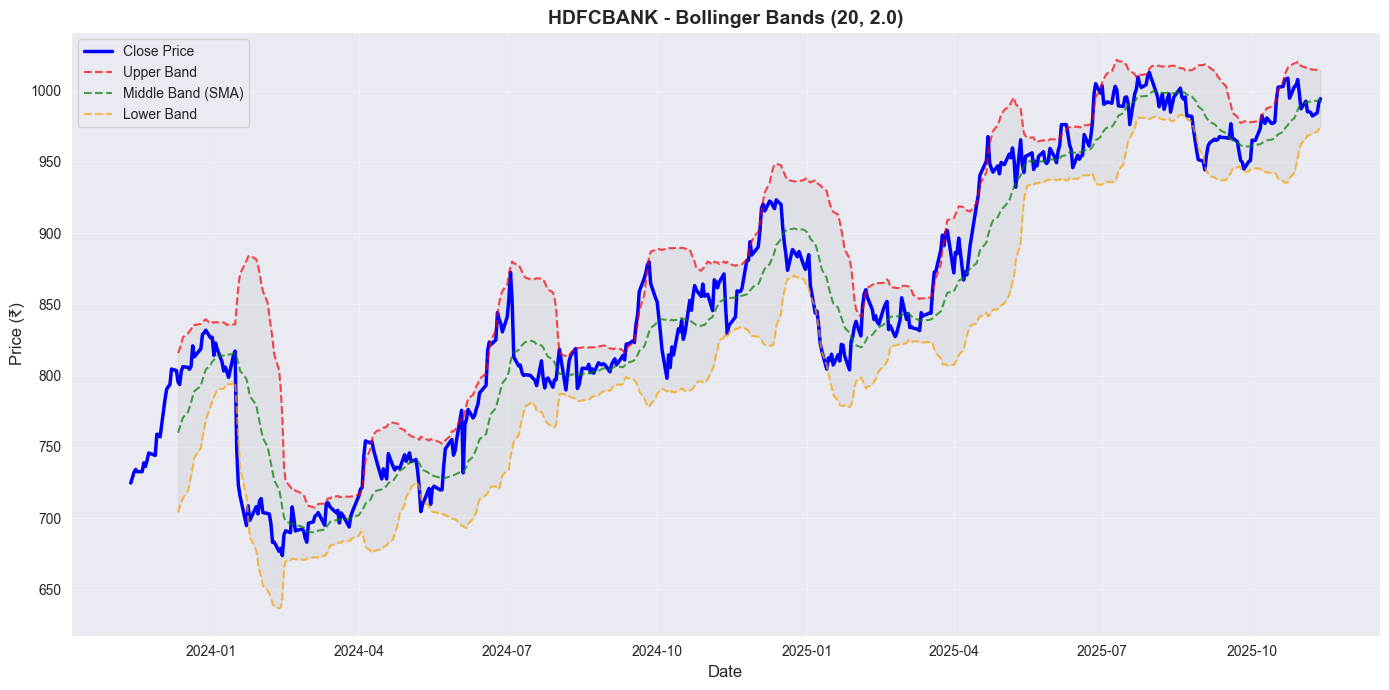

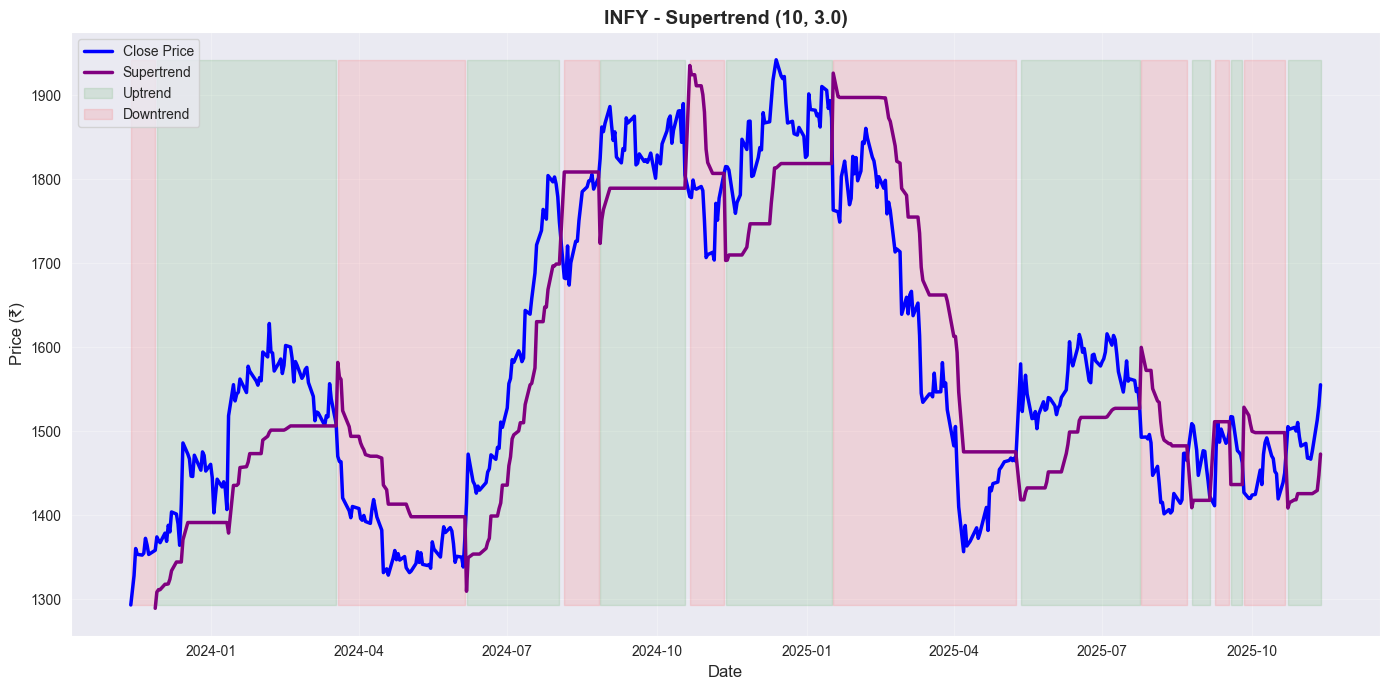


TECHNICAL INDICATOR SCORES (0-100)
    Stock  RSI  MACD  BB  Supertrend  Composite
 RELIANCE   30    75  87          70       64.9
      TCS   40    75 100          70       70.0
 HDFCBANK   50    25  49          70       47.3
     INFY   40    75 100          70       70.0
KOTAKBANK   60    25  21          30       34.2


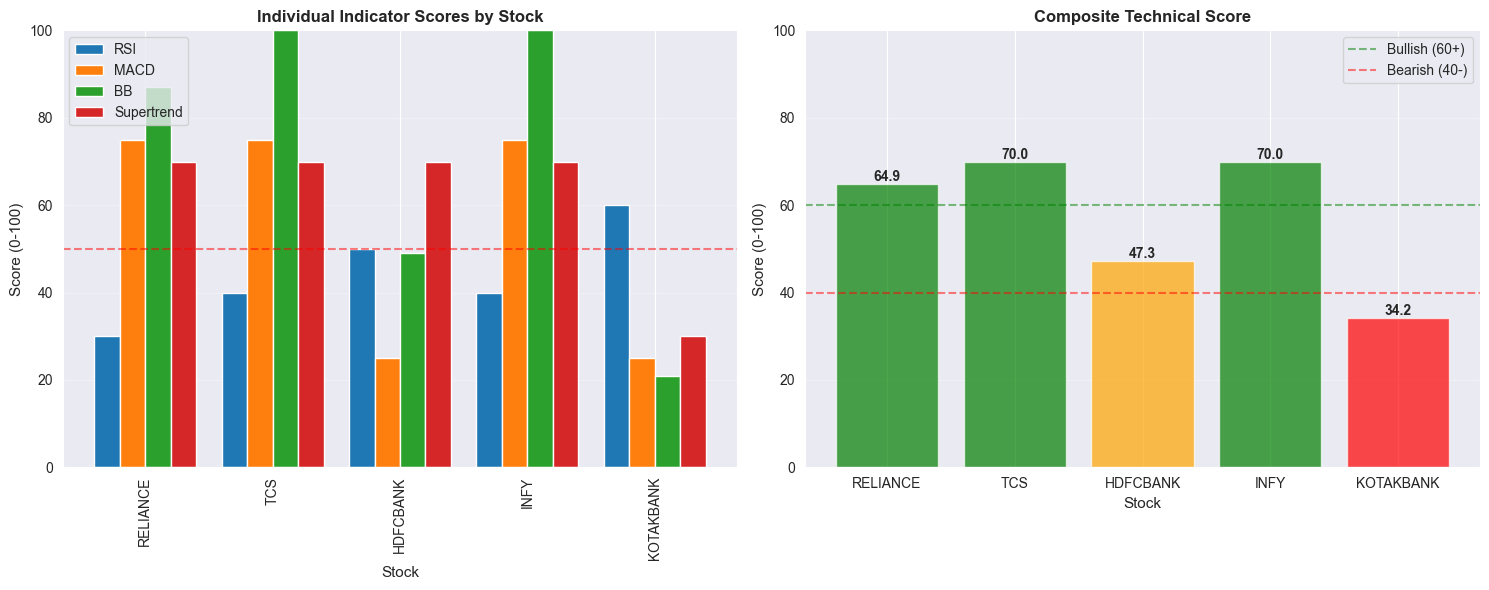


STOCK RECOMMENDATIONS BASED ON TECHNICAL SCORES

TCS: 🟢 STRONG BUY
  Score: 70.0/100
  RSI: 40.0 | MACD: 75.0 | BB: 100.0 | ST: 70.0
  → All indicators bullish

INFY: 🟢 STRONG BUY
  Score: 70.0/100
  RSI: 40.0 | MACD: 75.0 | BB: 100.0 | ST: 70.0
  → All indicators bullish

RELIANCE: 🟢 BUY
  Score: 64.9/100
  RSI: 30.0 | MACD: 75.0 | BB: 87.0 | ST: 70.0
  → Majority bullish signals

HDFCBANK: 🟡 NEUTRAL
  Score: 47.3/100
  RSI: 50.0 | MACD: 25.0 | BB: 49.0 | ST: 70.0
  → Conflicting signals

KOTAKBANK: 🔴 STRONG SELL
  Score: 34.2/100
  RSI: 60.0 | MACD: 25.0 | BB: 21.0 | ST: 30.0
  → All indicators bearish


✅ Scores saved to: notebooks\indicator_scores.csv


In [3]:
"""
indicator_analysis.ipynb
Jupyter Notebook for visualizing indicators and calculating scores.
This notebook is for exploration and testing only - doesn't modify source code.
Location: notebooks/indicator_analysis.ipynb
"""

# ==================== Cell 1: Setup and Imports ====================

import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Add src to path
sys.path.insert(0, str(Path('.').resolve() / 'src'))

from nse_analyzer.utils.config import ConfigManager

# Set up plotting style
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ All imports successful")
print(f"Project Root: {Path('.').resolve()}")

# ==================== Cell 2: Load Configuration ====================

config_manager = ConfigManager()
data_dir = config_manager.get_data_dir()
indicators_dir = data_dir / "indicators"

print(f"\n📊 Data Directory: {data_dir}")
print(f"📈 Indicators Directory: {indicators_dir}")

# List available indicator files
indicator_files = list(indicators_dir.glob("*_indicators.csv"))
print(f"\n📁 Available indicator files ({len(indicator_files)}):")
for f in sorted(indicator_files):
    print(f"   - {f.name}")

# ==================== Cell 3: Load Indicator Data ====================

def load_indicator_data(stock_name):
    """Load indicator CSV for a stock."""
    csv_path = indicators_dir / f"{stock_name}_indicators.csv"
    if csv_path.exists():
        df = pd.read_csv(csv_path)
        df['Date'] = pd.to_datetime(df['Date'])
        return df.sort_values('Date')
    return None

# Load all stocks
stocks = ["RELIANCE", "TCS", "HDFCBANK", "INFY", "KOTAKBANK"]
data = {}

for stock in stocks:
    df = load_indicator_data(stock)
    if df is not None:
        data[stock] = df
        print(f"✅ {stock}: {len(df)} rows loaded")
    else:
        print(f"❌ {stock}: File not found")

# ==================== Cell 4: Inspect Data Structure ====================

# Show first few rows
stock = "RELIANCE"
print(f"\n📋 Data Structure for {stock}:")
print(f"Shape: {data[stock].shape}")
print(f"\nColumns: {list(data[stock].columns)}")
print(f"\nFirst 5 rows:")
print(data[stock].head())
print(f"\nData types:")
print(data[stock].dtypes)

# ==================== Cell 5: Plot Price and RSI ====================

def plot_price_rsi(stock, data_dict):
    """Plot close price with RSI indicator."""
    df = data_dict[stock]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
    
    # Plot 1: Close price
    ax1.plot(df['Date'], df['Close'], label='Close Price', color='blue', linewidth=2)
    ax1.fill_between(df['Date'], df['Close'].min(), df['Close'], alpha=0.1)
    ax1.set_ylabel('Price (₹)', fontsize=12)
    ax1.set_title(f'{stock} - Close Price', fontsize=14, fontweight='bold')
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: RSI
    ax2.plot(df['Date'], df['RSI_14'], label='RSI (14)', color='orange', linewidth=2)
    ax2.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
    ax2.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
    ax2.fill_between(df['Date'], 30, 70, alpha=0.1, color='gray')
    ax2.set_ylabel('RSI', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_title(f'{stock} - RSI (14)', fontsize=14, fontweight='bold')
    ax2.legend(loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0, 100])
    
    plt.tight_layout()
    plt.show()

# Plot for RELIANCE
plot_price_rsi("RELIANCE", data)

# ==================== Cell 6: Plot MACD ====================

def plot_macd(stock, data_dict):
    """Plot MACD indicator."""
    df = data_dict[stock]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
    
    # Plot 1: Close price
    ax1.plot(df['Date'], df['Close'], label='Close Price', color='blue', linewidth=2)
    ax1.set_ylabel('Price (₹)', fontsize=12)
    ax1.set_title(f'{stock} - Close Price', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: MACD
    ax2.plot(df['Date'], df['MACD'], label='MACD', color='blue', linewidth=2)
    ax2.plot(df['Date'], df['MACD_Signal'], label='Signal Line', color='red', linewidth=2)
    ax2.bar(df['Date'], df['MACD_Histogram'], label='Histogram', color='gray', alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.set_ylabel('MACD Value', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_title(f'{stock} - MACD (12, 26, 9)', fontsize=14, fontweight='bold')
    ax2.legend(loc='upper left')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot for TCS
plot_macd("TCS", data)

# ==================== Cell 7: Plot Bollinger Bands ====================

def plot_bollinger_bands(stock, data_dict):
    """Plot Bollinger Bands."""
    df = data_dict[stock]
    
    fig, ax = plt.subplots(figsize=(14, 7))
    
    ax.plot(df['Date'], df['Close'], label='Close Price', color='blue', linewidth=2.5)
    ax.plot(df['Date'], df['BB_Upper_20'], label='Upper Band', color='red', linestyle='--', alpha=0.7)
    ax.plot(df['Date'], df['BB_Middle_20'], label='Middle Band (SMA)', color='green', linestyle='--', alpha=0.7)
    ax.plot(df['Date'], df['BB_Lower_20'], label='Lower Band', color='orange', linestyle='--', alpha=0.7)
    
    ax.fill_between(df['Date'], df['BB_Upper_20'], df['BB_Lower_20'], alpha=0.1, color='gray')
    
    ax.set_ylabel('Price (₹)', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_title(f'{stock} - Bollinger Bands (20, 2.0)', fontsize=14, fontweight='bold')
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot for HDFCBANK
plot_bollinger_bands("HDFCBANK", data)

# ==================== Cell 8: Plot Supertrend ====================

def plot_supertrend(stock, data_dict):
    """Plot Supertrend indicator with price."""
    df = data_dict[stock]
    
    fig, ax = plt.subplots(figsize=(14, 7))
    
    ax.plot(df['Date'], df['Close'], label='Close Price', color='blue', linewidth=2.5, zorder=2)
    ax.plot(df['Date'], df['Supertrend'], label='Supertrend', color='purple', linewidth=2.5, zorder=3)
    
    # Color background based on trend direction
    uptrend = df['Supertrend_Direction'] > 0
    ax.fill_between(df['Date'], df['Close'].min(), df['Close'].max(), 
                     where=uptrend, alpha=0.1, color='green', label='Uptrend')
    ax.fill_between(df['Date'], df['Close'].min(), df['Close'].max(), 
                     where=~uptrend, alpha=0.1, color='red', label='Downtrend')
    
    ax.set_ylabel('Price (₹)', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_title(f'{stock} - Supertrend (10, 3.0)', fontsize=14, fontweight='bold')
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot for INFY
plot_supertrend("INFY", data)

# ==================== Cell 9: Calculate Technical Score ====================

def calculate_technical_score(df):
    """
    Calculate a composite technical score (0-100) based on indicators.
    
    Scoring Logic:
    - RSI (14): Neutral at 50, Overbought at 70+, Oversold at 30-
    - MACD: Bullish when MACD > Signal, Histogram positive
    - Bollinger Bands: Price position relative to bands
    - Supertrend: Uptrend = bullish, Downtrend = bearish
    """
    latest = df.iloc[-1]
    
    scores = {}
    
    # 1. RSI Score (0-100)
    rsi = latest['RSI_14']
    if rsi >= 70:
        rsi_score = 30  # Overbought - bearish
    elif rsi >= 60:
        rsi_score = 40
    elif rsi > 50:
        rsi_score = 50
    elif rsi > 40:
        rsi_score = 60
    elif rsi <= 30:
        rsi_score = 70  # Oversold - bullish
    else:
        rsi_score = 50  # Neutral
    scores['RSI'] = rsi_score
    
    # 2. MACD Score (0-100)
    macd_line = latest['MACD']
    signal_line = latest['MACD_Signal']
    histogram = latest['MACD_Histogram']
    
    if histogram > 0 and macd_line > signal_line:
        macd_score = 75  # Bullish crossover
    elif histogram > 0:
        macd_score = 60  # Positive histogram
    elif histogram < 0 and macd_line < signal_line:
        macd_score = 25  # Bearish crossover
    elif histogram < 0:
        macd_score = 40  # Negative histogram
    else:
        macd_score = 50  # Neutral
    scores['MACD'] = macd_score
    
    # 3. Bollinger Bands Score (0-100)
    close = latest['Close']
    upper = latest['BB_Upper_20']
    middle = latest['BB_Middle_20']
    lower = latest['BB_Lower_20']
    
    bb_percent = (close - lower) / (upper - lower) if (upper - lower) > 0 else 0.5
    bb_score = int(bb_percent * 100)
    scores['BB'] = max(0, min(100, bb_score))
    
    # 4. Supertrend Score (0-100)
    if latest['Supertrend_Direction'] > 0:
        supertrend_score = 70  # Uptrend
    else:
        supertrend_score = 30  # Downtrend
    scores['Supertrend'] = supertrend_score
    
    # 5. Composite Score
    composite = (scores['RSI'] * 0.25 + 
                 scores['MACD'] * 0.30 + 
                 scores['BB'] * 0.20 + 
                 scores['Supertrend'] * 0.25)
    
    return {
        'RSI': round(scores['RSI'], 2),
        'MACD': round(scores['MACD'], 2),
        'BB': round(scores['BB'], 2),
        'Supertrend': round(scores['Supertrend'], 2),
        'Composite': round(composite, 2)
    }

# Calculate scores for all stocks
print("\n" + "="*80)
print("TECHNICAL INDICATOR SCORES (0-100)")
print("="*80)

scores_df = pd.DataFrame()
for stock in stocks:
    if stock in data:
        score = calculate_technical_score(data[stock])
        score['Stock'] = stock
        scores_df = pd.concat([scores_df, pd.DataFrame([score])], ignore_index=True)

# Reorder columns
scores_df = scores_df[['Stock', 'RSI', 'MACD', 'BB', 'Supertrend', 'Composite']]
print(scores_df.to_string(index=False))
print("="*80)

# ==================== Cell 10: Visualize Scores ====================

def plot_scores(scores_df):
    """Plot indicator scores for all stocks."""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Radar chart style (bar plot)
    ax1 = axes[0]
    scores_df.set_index('Stock')[['RSI', 'MACD', 'BB', 'Supertrend']].plot(
        kind='bar', ax=ax1, width=0.8
    )
    ax1.set_title('Individual Indicator Scores by Stock', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Score (0-100)', fontsize=11)
    ax1.set_xlabel('Stock', fontsize=11)
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='Neutral')
    ax1.set_ylim([0, 100])
    
    # Plot 2: Composite score
    ax2 = axes[1]
    colors = ['🟢' if x > 60 else '🟡' if x > 40 else '🔴' for x in scores_df['Composite']]
    bars = ax2.bar(scores_df['Stock'], scores_df['Composite'], 
                   color=['green' if x > 60 else 'orange' if x > 40 else 'red' 
                         for x in scores_df['Composite']], alpha=0.7)
    
    ax2.set_title('Composite Technical Score', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Score (0-100)', fontsize=11)
    ax2.set_xlabel('Stock', fontsize=11)
    ax2.set_ylim([0, 100])
    ax2.axhline(y=60, color='green', linestyle='--', alpha=0.5, label='Bullish (60+)')
    ax2.axhline(y=40, color='red', linestyle='--', alpha=0.5, label='Bearish (40-)')
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.legend()
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

plot_scores(scores_df)

# ==================== Cell 11: Stock Recommendations ====================

print("\n" + "="*70)
print("STOCK RECOMMENDATIONS BASED ON TECHNICAL SCORES")
print("="*70)

# Sort by composite score
scores_sorted = scores_df.sort_values('Composite', ascending=False)

for idx, row in scores_sorted.iterrows():
    score = row['Composite']
    if score >= 70:
        signal = "🟢 STRONG BUY"
        reasoning = "All indicators bullish"
    elif score >= 60:
        signal = "🟢 BUY"
        reasoning = "Majority bullish signals"
    elif score >= 55:
        signal = "🟡 HOLD"
        reasoning = "Mixed signals, slightly bullish"
    elif score >= 45:
        signal = "🟡 NEUTRAL"
        reasoning = "Conflicting signals"
    elif score >= 40:
        signal = "🟠 SELL"
        reasoning = "Majority bearish signals"
    else:
        signal = "🔴 STRONG SELL"
        reasoning = "All indicators bearish"
    
    print(f"\n{row['Stock']}: {signal}")
    print(f"  Score: {score:.1f}/100")
    print(f"  RSI: {row['RSI']:.1f} | MACD: {row['MACD']:.1f} | BB: {row['BB']:.1f} | ST: {row['Supertrend']:.1f}")
    print(f"  → {reasoning}")

print("\n" + "="*70)

# ==================== Cell 12: Save scores to CSV ====================

# ==================== Cell 12: Save scores to CSV ====================

output_dir = Path("notebooks")
output_dir.mkdir(parents=True, exist_ok=True)  # ✅ Create if doesn't exist

output_path = output_dir / "indicator_scores.csv"
scores_df.to_csv(output_path, index=False)
print(f"\n✅ Scores saved to: {output_path}")
